In [34]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  
from random import random, randint

# speed of light
c = 299792458 
sample_rate = 12000000 # SPS according to the Paper 

In [35]:
def dist(p1, p2, dimensions = 3):
    if dimensions == 3:
        d = np.sqrt(np.power(p2[0]-p1[0],2) + np.power(p2[1]-p1[1],2) + np.power(p2[2]-p1[2],2))
    elif dimensions == 2:
        d = np.sqrt(np.power(p2[0]-p1[0],2) + np.power(p2[1]-p1[1],2))
    return d

In [36]:
def create_a_row(p1, p2, x0, dimensions=3):
    """
    A = (x-a/rB1 - x-d/rB2), (y-b/rB1 - x-3/rB2), (z-c/rB1 - x-f/rB2)
    """
    row = []
    for i in range(dimensions):
        row.append((x0[i] - p1[i])/dist(x0,p1, dimensions=dimensions) - (x0[i] - p2[i])/dist(x0,p2, dimensions=dimensions))
    
    return row
    

In [37]:
def create_fx(p1, p2, x0, dimensions=3):
    return dist(p1, x0, dimensions=dimensions) - dist(p2, x0, dimensions=dimensions)

In [46]:
num_gen_obs = 50
source_pos = [0,0,0]
rovers = []
for i in range(num_gen_obs):
    r_pos = [randint(-20, 20), randint(-20, 20), randint(-20, 20)]
    rovers.append(r_pos)

<IPython.core.display.Javascript object>


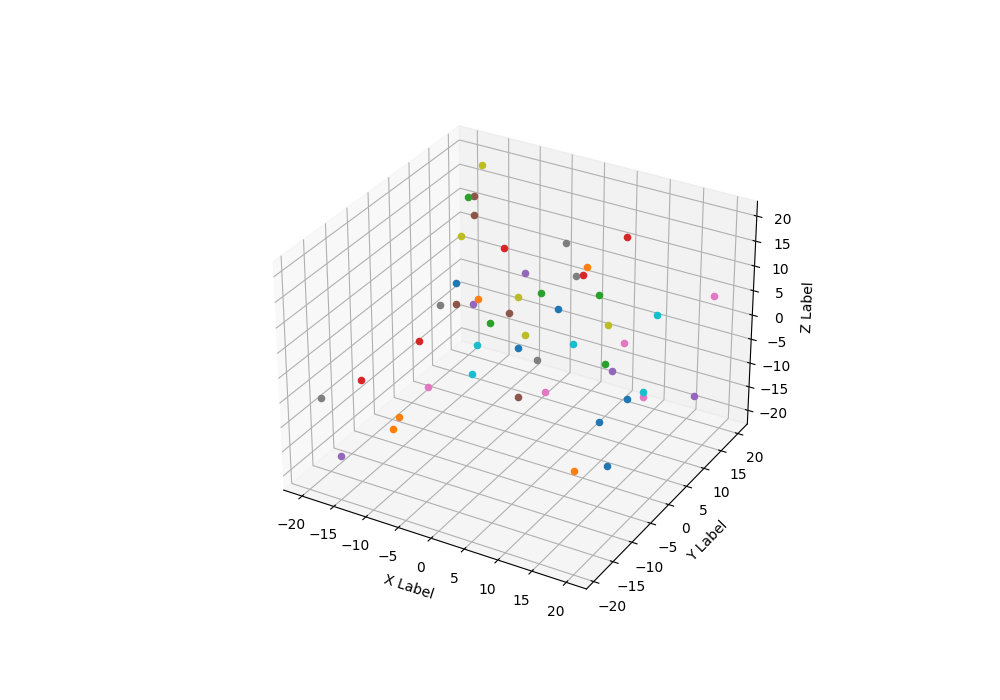

In [47]:
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter(source_pos[0], source_pos[1], source_pos[2])
for item in rovers:
    ax.scatter(item[0], item[1], item[2])
    

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')


plt.show()

# Create observations

In [48]:
tdoa_obs = []
num_obs = len(rovers)
for i, r in enumerate(rovers):
    for j in list(range(i, num_obs)):
#         print(f'{i} {j}')
        if i != j:
            tdoa_obs.append((i, j, (dist(rovers[j], source_pos) - dist(rovers[i], source_pos)) + random()*1))


In [49]:
# initial pos
x0 = [1,1, 1]

In [54]:
# Create A and w
dimensions = 3

for i in range(15):

    a_mat_list = []
    w_list = []
    for obs in tdoa_obs:
        a_mat_list.append(create_a_row(rovers[obs[0]], rovers[obs[1]], x0, dimensions=dimensions))
        fx =  create_fx(rovers[obs[1]], rovers[obs[0]], x0, dimensions=dimensions)
        print(f'{obs[2]} - {fx})')
        w_list.append(fx - obs[2] )

    A = np.array(a_mat_list)
    w = np.array(w_list)
    N = np.matmul(np.transpose(A), A)
    U = np.matmul(np.transpose(A), w)
    delta = np.matmul(np.linalg.inv(N),U)
#     print(f'{x0}, {delta}')
    x0 = x0 + delta

print(f'Resulting pos: {x0},\t{dist(x0,source_pos, dimensions=dimensions)} m away from truth')

-6.841177679034592 - -7.108535591663109)
2.1973537600245194 - 1.5433210852648358)
-9.498732392797145 - -10.162207471804281)
5.0702984700606635 - 4.9672726804646565)
-6.969209722914599 - -7.577060219793131)
6.647609074831693 - 5.615419533548767)
1.8580103203200011 - 1.4593119184073124)
1.5838695436644197 - 0.7509687905976641)
-8.937753168066784 - -9.085037804843763)
5.169256862937726 - 4.558887524466549)
3.1003281562741467 - 3.0888274808226264)
3.3347410797026473 - 2.5250013156239213)
10.541031152224393 - 9.917532101873327)
-10.24301317246705 - -10.913418539346235)
-6.322435061456995 - -6.58547518487749)
-2.3721340762439516 - -2.2551077254941987)
-3.7408121824796514 - -3.7304327341598587)
-2.0696962573306648 - -2.359127040313666)
-5.510076413964766 - -5.585347108362836)
-6.594211776813687 - -7.529350661929453)
-2.5475748299234406 - -3.286220256962988)
3.967847621169719 - 2.9485028172723595)
-6.4727776935953845 - -6.440496088643323)
-0.610892248606388 - -0.7958745361901336)
-6.1624441214

0.888483058573426 - 0.7243703586639931)
-5.356044788527413 - -6.407956089753274)
3.8641504460547207 - 3.7563551831524897)
9.62647631806939 - 8.651856676927945)
-1.9686187956342294 - -3.053671880141172)
12.902020960630784 - 12.075808272127766)
-0.09384664938306964 - -0.46852462813002127)
13.976796323483697 - 12.723955125211877)
8.973438799077456 - 8.567847510070422)
8.387300409397898 - 7.8595043822607735)
-1.9050537390117825 - -1.9765022131806536)
12.55956693295461 - 11.667423116129658)
11.084251986357646 - 10.197363072485736)
10.323943887903305 - 9.63353690728703)
18.119406071219153 - 17.026067693536437)
-3.462245903117418 - -3.804882947683126)
1.576691899978647 - 0.5230604067856195)
5.058045336188317 - 4.853427866168911)
3.9293629845998024 - 3.378102857503251)
5.289712513797788 - 4.749408551349443)
1.8736200572764785 - 1.5231884833002738)
-0.2135220706810309 - -0.4208150702663431)
3.881165830378511 - 3.8223153347001215)
10.52154540034581 - 10.057038408935469)
0.8161433098450442 - 0.66

13.57975096128871 - 12.80974946476759)
6.270373511059121 - 5.668711209992887)
12.50597548154317 - 11.787451255841836)
19.089229999780375 - 18.58501869123848)
9.980251215580891 - 9.443967911222968)
4.276539022977003 - 4.097828044623794)
3.1438637755076706 - 2.98209417119139)
12.722295623852089 - 12.264459703838716)
2.015699752407507 - 1.6212370846713746)
0.1260244055305394 - 0.03216462093563699)
11.420909676833762 - 11.339946655615206)
14.139374039357778 - 14.232957221330958)
3.394202627758303 - 3.6689250515565153)
8.947025937778585 - 8.301430578457124)
1.26042556876051 - 1.169104130039857)
11.538528926976861 - 11.33341540294562)
-3.4798387444650536 - -4.156107615141455)
-4.924587203701842 - -4.864450742951103)
-14.233366716732021 - -14.70045733839253)
-0.5325467195634808 - -1.0565320090822183)
-2.520834381817938 - -2.5265920527261407)
-2.6121062556958554 - -3.090418217924846)
4.898906920446002 - 4.30211256832456)
-16.362392335050846 - -16.528838072895002)
-12.270617795929237 - -12.2008

13.001313606283231 - 12.13594774425968)
10.823658383275662 - 10.665887700615757)
10.422309370941036 - 10.102061535417052)
18.21305445256247 - 17.49459232166646)
-3.0348828565798334 - -3.3363583195531046)
1.4961149987654032 - 0.9915850349156408)
5.441476499219743 - 5.321952494298932)
4.3962292348927505 - 3.846627485633272)
4.970603303502924 - 5.217933179479465)
2.2947327641274047 - 1.991713111430295)
0.6015279835499818 - 0.04770955786367814)
4.153693697133277 - 4.290839962830143)
10.477501074010004 - 10.52556303706549)
1.1231231042961356 - 1.1365641311498074)
7.174380507041224 - 6.781185683602997)
1.475416995147092 - 1.1331805015831442)
-0.2132838330587058 - -0.7849169999066419)
-0.5056756060476983 - -0.2554491446283098)
6.1860804705224295 - 6.114520092203373)
9.80261163765485 - 9.288129146537697)
10.228728462315559 - 9.314750543196444)
6.033158843662374 - 6.045603225085108)
3.6590560346488408 - 3.37431407784778)
14.741894228441168 - 14.694879100606366)
13.57975096128871 - 12.8097494647

-3.930854177675221 - -3.74851184211893)
-9.23521034442154 - -9.094651708718104)
-9.914033751037898 - -10.210385582150508)
-0.34384082555274753 - -0.9280200495031821)
-11.624600736163588 - -11.571242668670523)
-13.058219031102498 - -13.16031513240626)
-1.1961434200466017 - -1.8525330977266918)
0.7563944835797992 - 1.04047746798906)
-9.50239105246279 - -9.523554701785383)
-4.655108114788325 - -4.891049174884774)
-11.26655741763909 - -12.02337562330204)
-1.1938981716126635 - -1.8590643503962774)
-0.06882940149182615 - -0.7083431278096484)
-10.428872131695123 - -10.544349723251075)
3.8914797654195414 - 3.0995756060592363)
1.8752141373838902 - 1.629515562415314)
1.14656360970962 - 1.0656893972166088)
9.384153227669405 - 8.458220183466015)
-12.056127663310996 - -12.372730457753548)
-7.31964577297836 - -8.044787103284802)
-3.293234505418061 - -3.714419643901511)
-4.3480407004071155 - -5.189744652567171)
-3.507756155386923 - -3.8184389587209786)
-6.710244405001755 - -7.044659026770148)
-8.4844

-3.2347173259990774 - -3.9043506068042007)
-3.6579058615270257 - -3.8777292101454535)
-7.3420119012099345 - -7.14687652825679)
-9.294942767499439 - -9.818165675494118)
1.3644234826293016 - 1.5023993472644683)
0.08788282172182715 - -0.382730288574308)
-7.521003281838099 - -7.523768543349007)
-0.7562753521181933 - -1.4050284975000622)
5.4365503876014944 - 5.392538937896582)
-3.930854177675221 - -3.74851184211893)
-9.23521034442154 - -9.094651708718104)
-9.914033751037898 - -10.210385582150508)
-0.34384082555274753 - -0.9280200495031821)
-11.624600736163588 - -11.571242668670523)
-13.058219031102498 - -13.16031513240626)
-1.1961434200466017 - -1.8525330977266918)
0.7563944835797992 - 1.04047746798906)
-9.50239105246279 - -9.523554701785383)
-4.655108114788325 - -4.891049174884774)
-11.26655741763909 - -12.02337562330204)
-1.1938981716126635 - -1.8590643503962774)
-0.06882940149182615 - -0.7083431278096484)
-10.428872131695123 - -10.544349723251075)
3.8914797654195414 - 3.0995756060592363)

0.2718542529521053 - 0.19436923813847784)
-2.6785479825035736 - -3.074778079972859)
-5.126191461748485 - -5.746067227210187)
6.038854159742894 - 5.5744977955484)
4.06006334031656 - 3.6893681597096233)
-3.610098037821124 - -3.451670095065076)
3.022610294905287 - 2.6670699507838727)
10.179962559966132 - 9.464637386180513)
0.12443532294345327 - 0.32358660616500146)
-4.815509227183004 - -5.022553260434172)
-6.167105275788449 - -6.1382871338665765)
3.5294425994132617 - 3.1440783987807492)
-6.99458458154923 - -7.499144220386592)
-8.496412099082418 - -9.08821668412233)
2.2420721731583204 - 2.2195653505572395)
5.578175434317163 - 5.112575916272991)
-5.138487799581854 - -5.451456253501451)
-0.4457246092670253 - -0.8189507266008427)
-7.879846569071771 - -7.9512771750181095)
2.8152432848216202 - 2.213034097887654)
15.288384977647924 - 15.129480152268938)
3.4978232764641883 - 2.5851472520111507)
16.668920974736473 - 15.777627005353049)
12.221547945829533 - 11.621519390211594)
10.912109217498902 - 

-11.885736715361945 - -12.544332900257787)
1.3405931845826267 - 0.6481468530841106)
-3.135698254542534 - -3.507960762057344)
-3.96921739071986 - -4.2163038898669924)
-13.967663358979342 - -14.05231048530842)
-0.2088248670086542 - -0.40838515599810776)
-1.331103980327975 - -1.8784451996420302)
-2.0006909695543116 - -2.4422713648407353)
5.31091038995007 - 4.950259421408671)
-15.324493903114666 - -15.880691219810892)
-11.108324983850856 - -11.552747865342146)
-7.058008175334955 - -7.222380405958855)
-7.6516023888275315 - -8.697705414624512)
-7.260955020258494 - -7.326399720778323)
-9.578471093769325 - -10.552619788827492)
-12.359633613452875 - -12.496623342394109)
-8.136285215723833 - -8.253492937427644)
-1.5392065024887263 - -2.018769863192297)
-11.063561761618342 - -11.40776876910798)
-4.757077462721164 - -5.76314721665479)
-11.001087151789923 - -11.411152398674643)
-12.8371688445795 - -13.32924990016443)
-12.805584154698636 - -12.799782044886097)
-5.5848612236726325 - -6.42981280805441

10.634741007714302 - 10.135129176707164)
-0.052332392653826165 - -0.42890299306727897)
4.79042964858893 - 4.20360253383333)
-2.442683032395113 - -2.928723914583937)
8.053910813342213 - 7.235587358321826)
10.343992493018133 - 9.282365532647326)
-1.2281277230567653 - -1.3608570865200154)
-1.9475123547960256 - -2.949929550255753)
8.703080144261552 - 8.357852484423816)
11.544623903573353 - 11.250863050139568)
1.0619489497342611 - 0.6868308803651253)
6.011671185620121 - 5.319336407265734)
-0.9319355293424643 - -1.812990041151533)
8.918872109898912 - 8.35132123175423)
-10.459155900113362 - -10.643222619167341)
-11.810441805690692 - -12.232295082903079)
-0.5993576644904947 - -0.9245130482235098)
1.9630120900785384 - 1.968497517492242)
-8.037727781133537 - -8.5955346522822)
-3.6203136642327514 - -3.963029125381592)
-10.581546829476448 - -11.095355573798859)
-0.27550077633642767 - -0.9310443008930953)
-1.5253176081593502 - -1.5890724637357376)
10.407495853688678 - 9.718709570943831)
13.41009270

-6.09494637156061 - -6.393448522149242)
-12.4859705339666 - -13.52577497056651)
-2.902875373773549 - -3.3614636976607457)
-6.479385696466112 - -7.141038254774699)
-0.7450982977509749 - -1.0222982089257506)
6.639593488142967 - 5.77526922647089)
-2.6553954802972646 - -3.365781553544622)
-8.739545175450267 - -8.711921420143796)
-9.428161451577445 - -9.8276552935762)
-0.2800402993621772 - -0.545289760928874)
-10.541076267706629 - -11.188512380096215)
-12.220432149735656 - -12.777584843831953)
-0.5388637030544526 - -1.4698028091523838)
1.8724367547600862 - 1.423207756563368)
-8.435317242174287 - -9.140824413211075)
-3.5060995355805527 - -4.508318886310466)
-10.694145283433922 - -11.640645334727733)
-0.6846262944960555 - -1.4763340618219694)
7.173835641350372 - 6.1187400458489485)
13.315018701764338 - 12.916307481245589)
4.710938075738795 - 3.7752567012300773)
-0.6714765498663621 - -1.5708831653690964)
-2.2305418890832347 - -2.6866170388015007)
7.26320654067549 - 6.595748493845825)
-3.273763

2.8823420985582757 - 2.255827353372016)
-4.093808270144625 - -4.876499095045251)
5.977073063165398 - 5.287812177860513)
11.458836732258556 - 11.320565022758586)
10.38979170222572 - 9.43543538691981)
3.0584539830064963 - 2.294397132145111)
9.1867999764281 - 8.41313717799406)
15.394381064601493 - 15.2107046133907)
6.289458252033864 - 6.069653833375188)
1.6183046329304347 - 0.7235139667760144)
0.06924957952248922 - -0.39221990665638984)
8.931303939706336 - 8.890145625990936)
-0.9169685636025176 - -1.7530769931764052)
-2.4266151006556447 - -3.342149456912143)
8.895543630175565 - 7.965632577767426)
10.88452600061117 - 10.858643143483178)
0.7380924740826649 - 0.29461097370873546)
5.183692189359514 - 4.927116500609344)
-1.9858705007985857 - -2.205209947807923)
8.088467494281506 - 7.959101325097841)
-0.9435262581956566 - -1.8851296358387764)
-9.003417711347293 - -9.026167890613475)
-2.103885738392317 - -2.907427844764527)
4.428061218524045 - 3.8901395906321135)
-4.80524579439497 - -5.250911189

-0.49979511511485863 - -0.9866985680805769)
-7.964351686869694 - -8.119025016497844)
2.1801082997461063 - 2.0452862564079197)
-2.88287313925036 - -3.2691473181113366)
-5.538376691847478 - -5.9404364653486645)
5.48734448563864 - 5.380128557409922)
3.4877589569524443 - 3.4949989215711454)
-3.3718966008003886 - -3.646039333203557)
2.76415475116633 - 2.4727007126453913)
9.720094772407467 - 9.270268148042035)
0.7901517033132675 - 0.12921736802652362)
-5.307366681926155 - -5.21692249857265)
-5.8391103762019005 - -6.332656372005054)
3.565787578932385 - 2.9497091606422714)
-7.69656728540989 - -7.69351345852507)
-9.531313530882292 - -9.282585922260807)
2.061613406957203 - 2.0251961124187616)
4.605323078370719 - 4.9182066781345135)
-5.507194224932969 - -5.645825491639929)
-0.535027276942895 - -1.0133199647393205)
-8.129809935734784 - -8.145646413156587)
2.5759998272377516 - 2.018664859749176)
-2.1341201067643896 - -2.671289147237328)
9.511314688049355 - 8.649275875521258)
7.727064754985601 - 6.7

-7.063384674441707 - -7.6668920618663225)
-9.190961280322664 - -9.25596452560206)
2.9314700842560537 - 2.051817509077509)
4.886664763889129 - 4.944828074793261)
-5.145525235799992 - -5.619204094981182)
-0.49979511511485863 - -0.9866985680805733)
-7.964351686869694 - -8.11902501649784)
2.1801082997461063 - 2.0452862564079233)
-2.88287313925036 - -3.2691473181113366)
-5.538376691847478 - -5.9404364653486645)
5.48734448563864 - 5.380128557409922)
3.4877589569524443 - 3.4949989215711454)
-3.3718966008003886 - -3.6460393332035537)
2.76415475116633 - 2.472700712645395)
9.720094772407467 - 9.270268148042035)
0.7901517033132675 - 0.12921736802652362)
-5.307366681926155 - -5.21692249857265)
-5.8391103762019005 - -6.332656372005054)
3.565787578932385 - 2.9497091606422714)
-7.69656728540989 - -7.69351345852507)
-9.531313530882292 - -9.282585922260807)
2.061613406957203 - 2.0251961124187616)
4.605323078370719 - 4.9182066781345135)
-5.507194224932969 - -5.645825491639929)
-0.535027276942895 - -1.01

7.020135459257539 - 6.695229372564217)
0.0980100310264479 - -0.445808882210482)
5.934113354334237 - 5.6729311636384665)
13.100557494612707 - 12.470498599035107)
3.5951820572318036 - 3.3294478190195953)
-1.8629935991150788 - -2.0166920475795784)
-2.3552399645938724 - -3.1324259210119827)
6.8203816712921315 - 6.149939611635343)
-4.649094643968794 - -4.493283007531998)
-5.2913848992245605 - -6.082355471267736)
6.1559628802943696 - 5.225426563411833)
7.928948481696183 - 8.118437129127585)
-2.5038994407491777 - -2.4455950406468574)
2.70167475933871 - 2.186910486253751)
-4.1332155397058745 - -4.945415962163516)
5.748530306805609 - 5.218895310742248)
0.7554265468084673 - 0.026621396658747187)
-2.617720526138714 - -3.2425259214525894)
-5.17959927486322 - -5.913815068689917)
6.212311830273835 - 5.406749954068669)
4.463331804423926 - 3.5216203182298926)
-3.48921489742594 - -3.6194179365448065)
2.830431978562022 - 2.499322109304142)
9.919500402193865 - 9.296889544700782)
0.00679188817088805 - 0.1

2.8402492891431184 - 1.954021129946499)
12.332615914674708 - 12.118332402852262)
7.379527629099109 - 6.3699692368316825)
9.85576882484061 - 9.543578291166007)
10.100945520690725 - 9.570199687824754)
6.651860816472544 - 6.3010523697134175)
3.942936407688512 - 3.6297632224760896)
15.142485119425348 - 14.950328245234676)
13.211612577500336 - 13.0651986093959)
6.630855998699716 - 5.9241603546212005)
12.801782795248036 - 12.042900400470145)
19.351223622045772 - 18.84046783586679)
10.585689950659322 - 9.699417055851278)
5.032698917292988 - 4.353277189252104)
3.2932286494527947 - 3.2375433158197)
12.696474549618424 - 12.519908848467026)
2.476197926376615 - 1.8766862292996844)
0.8827547188622896 - 0.2876137655639468)
12.304533405441308 - 11.595395800243516)
15.322665861189014 - 14.488406365959268)
4.750240038066932 - 3.924374196184825)
9.116966127106094 - 8.556879723085434)
2.5869989485241716 - 1.4245532746681668)
12.080302931242391 - 11.58886454757393)
3.817015744311055 - 3.1736090543343245)


-2.902875373773549 - -3.3614636976607457)
-6.479385696466112 - -7.141038254774699)
-0.7450982977509749 - -1.0222982089257506)
6.639593488142967 - 5.77526922647089)
-2.6553954802972646 - -3.365781553544622)
-8.739545175450267 - -8.711921420143796)
-9.428161451577445 - -9.8276552935762)
-0.2800402993621772 - -0.545289760928874)
-10.541076267706629 - -11.188512380096215)
-12.220432149735656 - -12.777584843831953)
-0.5388637030544526 - -1.4698028091523838)
1.8724367547600862 - 1.423207756563368)
-8.435317242174287 - -9.140824413211075)
-3.5060995355805527 - -4.508318886310466)
-10.694145283433922 - -11.640645334727733)
-0.6846262944960555 - -1.4763340618219694)
7.173835641350372 - 6.1187400458489485)
13.315018701764338 - 12.916307481245589)
4.710938075738795 - 3.7752567012300773)
-0.6714765498663621 - -1.5708831653690964)
-2.2305418890832347 - -2.6866170388015007)
7.26320654067549 - 6.595748493845825)
-3.2737631322084573 - -4.047474125321516)
-5.3316629310479655 - -5.636546589057254)
5.900

In [53]:
w_list

[-0.26735791262851727,
 -0.6540326747596836,
 -0.6634750790071369,
 -0.10302578959600694,
 -0.6078504968785321,
 -1.0321895412829258,
 -0.3986984019126887,
 -0.8329007530667556,
 -0.14728463677697867,
 -0.6103693384711768,
 -0.011500675451520337,
 -0.809739764078726,
 -0.6234990503510662,
 -0.6704053668791854,
 -0.2630401234204953,
 0.11702635074975287,
 0.010379448319796314,
 -0.2894307829830014,
 -0.07527069439806944,
 -0.9351388851157658,
 -0.7386454270395473,
 -1.0193448038973596,
 0.032281604952061116,
 -0.18498228758374557,
 -0.28143559676025287,
 -0.687876284944414,
 -0.35290095196577376,
 -0.9785521651468027,
 -0.6555819271064007,
 -0.8081303124170138,
 0.02475275159006296,
 -0.717256129444972,
 -0.8420554707531096,
 -0.3013665517498829,
 -0.5922711276035417,
 -0.41798033296316284,
 -0.12850819212031084,
 0.08865306841832932,
 -0.43911144350125975,
 -0.7724548799097812,
 -0.7318184052862371,
 -0.624407941505611,
 -0.6245627962403724,
 -0.4068897820854369,
 -0.5263085208394553,


<IPython.core.display.Javascript object>


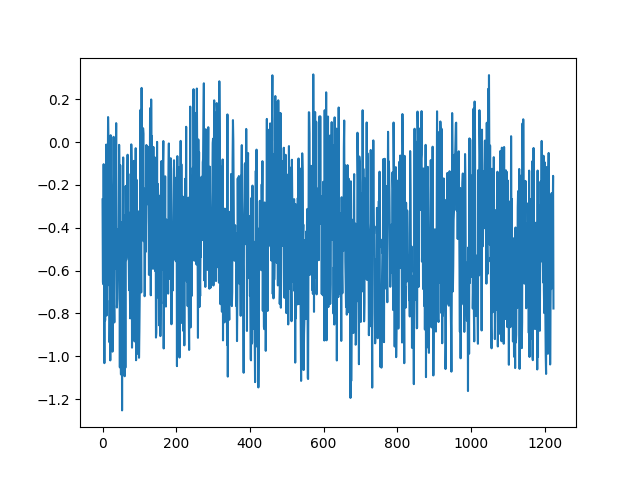

In [51]:
plt.figure()
plt.plot(w)
plt.show()

# Sandbox

In [17]:
enu_rx_1 = [775.609248 , 214.404072  ,12.87444]
enu_rx_2 = [776.756183 , 215.909126 , 12.83095]
dist_between = dist(enu_rx_1, enu_rx_2)

In [24]:
d_rx1 = dist([0,0,0], enu_rx_1)
d_rx2 = dist([0,0,0], enu_rx_2)
diff_range = np.abs(d_rx1 - d_rx2)

In [25]:
time_diff = diff_range/c

In [29]:
time_diff*sample_rate

0.060298096282422976

In [33]:
diff_range = 5
time_diff = diff_range/c
time_diff*sample_rate

0.20013845711889122